In [36]:
from voc_eval import voc_eval

rec,prec,ap=voc_eval('D:/test/color/{}.txt', 'D:/test/color/labels/{}.xml', 'D:/test/color/cfg/testy.txt', 'yellow', '.')
 
print('rec',rec)
print('prec',prec)
print('ap',ap)

"""
fr = open('D:/test/color/annots_yellow.txt','ab')
fr.write(rec)
fr.write(prec)
fr.write(ap)
fr.close
"""

Reading annotation for 1/213
Reading annotation for 101/213
Reading annotation for 201/213
Saving cached annotations to .\annots.pkl
rec [0.01492537 0.02985075 0.04477612 0.05970149 0.07462687 0.08955224
 0.10447761 0.11940299 0.13432836 0.14925373 0.1641791  0.17910448
 0.19402985 0.20895522 0.2238806  0.23880597 0.25373134 0.26865672
 0.28358209 0.29850746 0.31343284 0.32835821 0.34328358 0.35820896
 0.37313433 0.3880597  0.40298507 0.41791045 0.43283582 0.44776119
 0.46268657 0.47761194 0.49253731 0.50746269 0.52238806 0.53731343
 0.55223881 0.56716418 0.58208955 0.59701493 0.6119403  0.62686567
 0.64179104 0.65671642 0.67164179 0.68656716 0.70149254 0.71641791
 0.73134328 0.74626866 0.76119403 0.7761194  0.79104478 0.80597015
 0.82089552 0.8358209  0.85074627 0.86567164 0.88059701 0.89552239
 0.91044776 0.92537313 0.94029851 0.95522388 0.97014925 0.98507463
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     

<function BufferedWriter.close>

In [18]:
"""
#faster-RCNN方法執行reval_voc_py3.py(需要CSDN點數才可下載)生成pkl檔案
import pickle as cPickle
import matplotlib.pyplot as plt

fr = open('D:/test/color/annots_blue.pkl','rb')#这里open中第一个参数需要修改成自己生产的pkl文件
inf = cPickle.load(fr)
fr.close()

x=inf['rec']
y=inf['prec']
plt.figure()
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR cruve')
plt.plot(x,y)
plt.show()

print('AP：',inf['ap'])
"""

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Reading annotation for 1/213
Reading annotation for 101/213
Reading annotation for 201/213
Saving cached annotations to .\annots.pkl
cls: blue|| Recall: 0.4642857142857143 || Precison: 0.3939393939393939|| AP: 0.32540167459105596
____________________
cls: green|| Recall: 0.9130434782608695 || Precison: 0.6774193548387096|| AP: 0.8734539065252651
____________________
cls: red|| Recall: 0.6818181818181818 || Precison: 0.6521739130434783|| AP: 0.5059548978153627
____________________
cls: yellow|| Recall: 0.835820895522388 || Precison: 0.7777777777777778|| AP: 0.7593310558718754
____________________


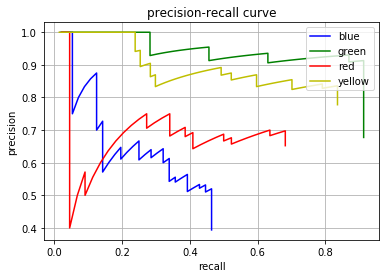

mAP is : 0.6160353837008898


In [14]:
#繪製pr圖
from voc_eval import voc_eval
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
os.remove("C:/Users/岱樺/annots.pkl")#刪除前一次執行在當前目錄產生的annots.pkl

AP_list = []#用於儲存每一類所得ap
clist = {'blue':0, 'green':1, 'red':2, 'yellow':3}#類別
cl = ['b', 'g', 'r', 'y']#pr圖線條顏色

#thresh: 設定iou比例大於多少為辨識成功
thresh = 0.85

#計算每一類Recall, Precison, AP並繪製pr圖
for cls, index in clist.items():
    """
    voc_eval()參數解釋：
    第1項：存放檢測結果文件的文件夾的路徑（每個類別一個單獨的文件，文件名可在valid命令時指定）+ { }.txt ；
    第2項：存放xml標籤文件的文件夾的路徑 + { }.xml ；
    第3項：測試集圖片名稱列表.txt文件的路徑 ；
    第4項：某類別對應的結果文件的名字（每次計算不同類別的AP，只需要更改此參數後重新運行腳本即可）；
    第5項：若無pkl文件的路徑，生成路徑
    第6項：iou比例大於多少為辨識成功
    """
    recall, precision, AP = voc_eval('D:/test/color/{}.txt', 'D:/test/color/labels/{}.xml', 'D:/test/color/cfg/testy.txt', cls, '.', thresh)
    AP_list += [AP]
    print("cls: {}|| Recall: {} || Precison: {}|| AP: {}".format(cls, recall[-1], precision[-1], AP))
    plt.plot(recall, precision, label=cls, color=cl[index])
    plt.legend(loc='upper right')
    print(10*"__")
plt.grid()
plt.title("precision-recall curve")
plt.xlabel('recall')
plt.ylabel('precision')
plt.savefig('D:/test/pr4000_thresh'+str(thresh)+'.jpg')#儲存圖檔
plt.show()
print("mAP is : {}".format(np.mean(AP_list)))